**Status**: Still needs work.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
data = pd.read_csv('bluebook-for-bulldozers/bluebook-for-bulldozers/TrainAndValid.csv')
df = data.copy()
df.head()

/tmp/ipykernel_4357/484551021.py:1: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/bluebook-for-bulldozers/bluebook-for-bulldozers/TrainAndValid.csv')


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [6]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,412698.00,412698.00,412698.00,412698.00,412698.00,392562.00,412698.00,147504.00
mean,2011161.16,31215.18,1230061.44,6947.20,135.17,6.59,1899.05,3522.99
std,1080067.72,23141.74,453953.26,6280.82,9.65,17.16,292.19,27169.93
min,1139246.00,4750.00,0.00,28.00,121.00,0.00,1000.00,0.00
25%,1421897.75,14500.00,1088593.25,3261.00,132.00,1.00,1985.00,0.00
50%,1645852.50,24000.00,1284397.00,4605.00,132.00,2.00,1995.00,0.00
75%,2261012.50,40000.00,1478079.25,8899.00,136.00,4.00,2001.00,3209.00
max,6333349.00,142000.00,2486330.00,37198.00,173.00,99.00,2014.00,2483300.00


# Analyzing relations between variables

In [8]:
corr_mat = df.corr().apply(abs).replace(1.0,0)

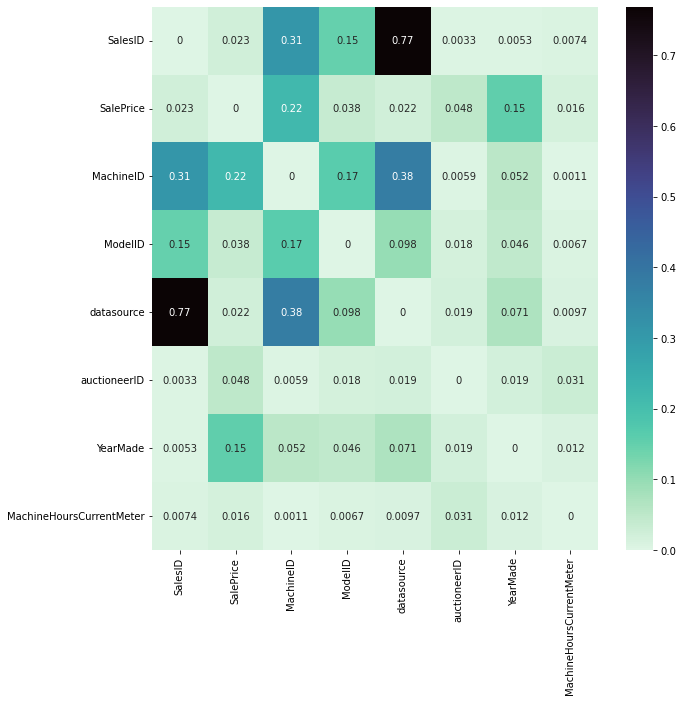

In [11]:
fig, ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(corr_mat,
                 cmap = 'mako_r',
                 annot = True)

### Correlations with target column

In [13]:
corr_mat.loc[:, 'SalePrice'].sort_values(ascending = False)

MachineID                  0.22
YearMade                   0.15
auctioneerID               0.05
ModelID                    0.04
SalesID                    0.02
datasource                 0.02
MachineHoursCurrentMeter   0.02
SalePrice                  0.00
Name: SalePrice, dtype: float64

# Checking for NaN values

In [15]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

# Date column

In [20]:
df.loc[:, 'saledate'] = pd.to_datetime(df.loc[:, 'saledate'])
df.loc[:, 'saledate'].head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

## Adding additional year column

In [26]:
df.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

In [27]:
df["saleYear"] = df.saledate.dt.year
df["saleMonth"] = df.saledate.dt.month
df["saleDay"] = df.saledate.dt.day
df["saleDayofweek"] = df.saledate.dt.dayofweek
df["saleDayofyear"] = df.saledate.dt.dayofyear

In [28]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,date_year,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
0,1139246,66000.00,999089,3157,121,3.00,2004,68.00,Low,2006-11-16,...,NaN,NaN,Standard,Conventional,2006,2006,11,16,3,320
1,1139248,57000.00,117657,77,121,3.00,1996,4640.00,Low,2004-03-26,...,NaN,NaN,Standard,Conventional,2004,2004,3,26,4,86
2,1139249,10000.00,434808,7009,121,3.00,2001,2838.00,High,2004-02-26,...,NaN,NaN,NaN,NaN,2004,2004,2,26,3,57
3,1139251,38500.00,1026470,332,121,3.00,2001,3486.00,High,2011-05-19,...,NaN,NaN,NaN,NaN,2011,2011,5,19,3,139
4,1139253,11000.00,1057373,17311,121,3.00,2007,722.00,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,2009,2009,7,23,3,204


### State column

In [29]:
df.state.head()

0           Alabama
1    North Carolina
2          New York
3             Texas
4          New York
Name: state, dtype: object

In [30]:
df.state.nunique()

53

In [31]:
df.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

# Missing data

In [50]:
df.loc[:, list(df.select_dtypes(include = object).columns)].nunique()

UsageBand                     3
fiModelDesc                5059
fiBaseModel                1961
fiSecondaryDesc             177
fiModelSeries               129
fiModelDescriptor           140
ProductSize                   6
fiProductClassDesc           74
state                        53
ProductGroup                  6
ProductGroupDesc              6
Drive_System                  4
Enclosure                     6
Forks                         2
Pad_Type                      4
Ride_Control                  3
Stick                         2
Transmission                  8
Turbocharged                  2
Blade_Extension               2
Blade_Width                   6
Enclosure_Type                3
Engine_Horsepower             2
Hydraulics                   12
Pushblock                     2
Ripper                        4
Scarifier                     2
Tip_Control                   3
Tire_Size                    17
Coupler                       3
Coupler_System                2
Grouser_

Convert these to category later on.

## Missing numeric data

In [52]:
df.loc[:, list(df.select_dtypes(include = np.number).columns)].isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
date_year                        0
saleYear                         0
saleMonth                        0
saleDay                          0
saleDayofweek                    0
saleDayofyear                    0
dtype: int64

In [56]:
df.auctioneerID.median()

2.0

In [58]:
df.ModelID.nunique()

5281

In [75]:
pivot_model_auctioneer = df.pivot_table(index = 'ModelID', values = 'auctioneerID', aggfunc = (lambda x: x.mode()))
pivot_model_auctioneer

,auctioneerID
ModelID,
28,2.00
29,1.00
31,1.00
34,2.00
43,1.00
...,...
36932,2.00
36933,"[2.0, 3.0]"
37196,1.00


In [125]:
pivot_temp = pivot_model_auctioneer.copy()

In [193]:
empty_list = []

In [194]:
for row,value in enumerate(pivot_temp.loc[:, ('auctioneerID')]):
    index = pivot_temp.index[row]
    
    try: 
        if (len(list(pivot_temp.loc[(index)].values[0]))) == 0:
            empty_list.append(404.0)

        else:
            empty_list.append(float(pivot_temp.loc[(index)].values[0][-1]))
        
    except:
        empty_list.append(float(pivot_temp.loc[(index)].values[0]))


In [197]:
pivot_temp.loc[:, ('single_value')] = empty_list

In [198]:
pivot_temp

,auctioneerID,single_value
ModelID,,
28,2.00,2.00
29,1.00,1.00
31,1.00,1.00
34,2.00,2.00
43,1.00,1.00
...,...,...
36932,2.00,2.00
36933,"[2.0, 3.0]",3.00
37196,1.00,1.00


In [200]:
pivot_temp.loc[:, ('single_value')].mode()

0   1.00
Name: single_value, dtype: float64

In [201]:
pivot_temp.loc[:, ('single_value')] = pivot_temp.loc[:, ('single_value')].replace(404.0, 1.0)

In [204]:
pivot_temp = pivot_temp.drop('auctioneerID', axis = 1)

### Replace missing values with respective modelID's mode value

In [68]:
df_tmp = df.copy()

In [206]:
auctioneerID_nan_index = list(df_tmp.loc[df_tmp.auctioneerID.isna()].index)

In [207]:
auctioneerID_nan_index

[284732,
 284733,
 284737,
 284740,
 284742,
 284750,
 284751,
 284754,
 284756,
 284757,
 284758,
 284759,
 284764,
 284766,
 284772,
 284774,
 284775,
 284776,
 284778,
 284780,
 284781,
 284784,
 284786,
 284787,
 284788,
 284789,
 284790,
 284791,
 284792,
 284793,
 284794,
 284798,
 284799,
 284801,
 284802,
 284805,
 284806,
 284807,
 284808,
 284810,
 284811,
 284812,
 284814,
 284815,
 284816,
 284817,
 284819,
 284822,
 284824,
 284826,
 284829,
 284830,
 284831,
 284833,
 284834,
 284835,
 284838,
 284840,
 284846,
 284847,
 284848,
 284849,
 284856,
 284857,
 284859,
 284861,
 284863,
 284866,
 284867,
 284869,
 284872,
 284873,
 284874,
 284877,
 284878,
 284879,
 284880,
 284883,
 284884,
 284885,
 284890,
 284891,
 284892,
 284893,
 284894,
 284895,
 284898,
 284899,
 284900,
 284902,
 284903,
 284904,
 284905,
 284906,
 284907,
 284910,
 284911,
 284912,
 284913,
 284914,
 284915,
 284918,
 284919,
 284920,
 284921,
 284925,
 284928,
 284929,
 284931,
 284932,
 284933,
 

In [216]:
for index in auctioneerID_nan_index:
    modelID = df_tmp.loc[index, 'ModelID']
    new_value = float(pivot_temp.loc[modelID])
    df_tmp.loc[index, 'auctioneerID'] = new_value

In [220]:
df = df_tmp.copy()

In [222]:
df.loc[:, 'auctioneerID'].isna().sum()

0

## Machine used column

In [223]:
df.loc[:, 'MachineHoursCurrentMeter']

0          68.00
1        4640.00
2        2838.00
3        3486.00
4         722.00
           ...  
412693       NaN
412694       NaN
412695       NaN
412696       NaN
412697       NaN
Name: MachineHoursCurrentMeter, Length: 412698, dtype: float64

In [231]:
pivot_used_month = df.pivot_table(index = 'saleMonth', values = 'MachineHoursCurrentMeter', aggfunc = 'median')

In [232]:
pivot_used_month

,MachineHoursCurrentMeter
saleMonth,
1,389.00
2,612.00
3,0.00
4,555.00
5,0.00
6,0.00
7,0.00
8,44.00
9,0.00


In [233]:
round(pivot_used_month.loc[:, ('MachineHoursCurrentMeter')].mean())

239

In [234]:
pivot_used_month.loc[:, ('MachineHoursCurrentMeter')].replace(0, round(pivot_used_month.loc[:, ('MachineHoursCurrentMeter')].mean()), inplace = True)

In [235]:
pivot_used_month

,MachineHoursCurrentMeter
saleMonth,
1,389.00
2,612.00
3,239.00
4,555.00
5,239.00
6,239.00
7,239.00
8,44.00
9,239.00


In [239]:
MachineHoursCurrentMeter_nan_index = list(df.loc[df.MachineHoursCurrentMeter.isna()].index)

[23974,
 23975,
 23976,
 23977,
 23978,
 23979,
 23980,
 23981,
 23982,
 23983,
 23984,
 23985,
 23986,
 23988,
 23989,
 23990,
 23991,
 23992,
 23993,
 23994,
 23995,
 23996,
 23997,
 23998,
 23999,
 24000,
 24001,
 24002,
 24003,
 24004,
 24005,
 24006,
 24007,
 24008,
 24009,
 24010,
 24011,
 24012,
 24013,
 24014,
 24015,
 24016,
 24017,
 24018,
 24019,
 24020,
 24021,
 24022,
 24023,
 24024,
 24025,
 24026,
 24027,
 24028,
 24029,
 24030,
 24031,
 24032,
 24033,
 24034,
 24035,
 24036,
 24037,
 24038,
 24039,
 24040,
 24041,
 24042,
 24043,
 24044,
 24045,
 24046,
 24047,
 24048,
 24049,
 24050,
 24051,
 24052,
 24053,
 24054,
 24055,
 24056,
 24057,
 24058,
 24059,
 24060,
 24061,
 24062,
 24063,
 24064,
 24065,
 24066,
 24067,
 24068,
 24069,
 24070,
 24071,
 24072,
 24073,
 24074,
 24075,
 24076,
 24077,
 24078,
 24079,
 24080,
 24081,
 24082,
 24083,
 24084,
 24085,
 24086,
 24087,
 24088,
 24089,
 24090,
 24091,
 24092,
 24093,
 24094,
 24095,
 24096,
 24097,
 24098,
 24099,


In [245]:
for index in MachineHoursCurrentMeter_nan_index:
    month = df.loc[index, 'saleMonth']
    new_value = float(pivot_used_month.loc[month])
    df.loc[index, 'MachineHoursCurrentMeter'] = new_value

### Checking numeric columns again

In [247]:
df.loc[:, list(df.select_dtypes(include = np.number).columns)].isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
date_year                   0
saleYear                    0
saleMonth                   0
saleDay                     0
saleDayofweek               0
saleDayofyear               0
dtype: int64

No missing values in numeric columns now

# New trials

In [248]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                     0
YearMade                         0
MachineHoursCurrentMeter         0
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [253]:
df.select_dtypes(include = object)

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,Low,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,Low,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,High,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,High,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Medium,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,NaN,30NX,30,NX,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Texas,TEX,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,NaN,30NX2,30,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Florida,TEX,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,NaN,30NX,30,NX,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Florida,TEX,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,NaN,30NX,30,NX,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Texas,TEX,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [254]:
df_tmp = df.copy()

In [258]:
object_cols = list(df_tmp.select_dtypes(include = object).columns)

In [259]:
for col in object_cols:
    df_tmp.loc[:, col] = df_tmp.loc[:, col].astype('category').cat.as_ordered()

In [262]:
df_tmp.drop('saledate', axis = 1, inplace = True)
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,date_year,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
0,1139246,66000.00,999089,3157,121,3.00,2004,68.00,Low,521D,...,NaN,NaN,Standard,Conventional,2006,2006,11,16,3,320
1,1139248,57000.00,117657,77,121,3.00,1996,4640.00,Low,950FII,...,NaN,NaN,Standard,Conventional,2004,2004,3,26,4,86
2,1139249,10000.00,434808,7009,121,3.00,2001,2838.00,High,226,...,NaN,NaN,NaN,NaN,2004,2004,2,26,3,57
3,1139251,38500.00,1026470,332,121,3.00,2001,3486.00,High,PC120-6E,...,NaN,NaN,NaN,NaN,2011,2011,5,19,3,139
4,1139253,11000.00,1057373,17311,121,3.00,2007,722.00,Medium,S175,...,NaN,NaN,NaN,NaN,2009,2009,7,23,3,204


In [263]:
df_tmp.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'date_year', 'saleYear',
       'saleMonth', 'saleDay', 'saleDayofweek', 'saleDayofyear']

In [266]:
len(list(df_tmp.select_dtypes(exclude = np.number).columns))

44

In [267]:
df_tmp.dtypes

SalesID                        int64
SalePrice                    float64
MachineID                      int64
ModelID                        int64
datasource                     int64
auctioneerID                 float64
YearMade                       int64
MachineHoursCurrentMeter     float64
UsageBand                   category
fiModelDesc                 category
fiBaseModel                 category
fiSecondaryDesc             category
fiModelSeries               category
fiModelDescriptor           category
ProductSize                 category
fiProductClassDesc          category
state                       category
ProductGroup                category
ProductGroupDesc            category
Drive_System                category
Enclosure                   category
Forks                       category
Pad_Type                    category
Ride_Control                category
Stick                       category
Transmission                category
Turbocharged                category
B

In [272]:
# df_tmp[label] = pd.Categorical(content).codes+1
for col in object_cols:
    df_tmp.loc[:, col] = pd.Categorical(df.loc[:, col]).codes + 1

In [273]:
df_tmp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,date_year,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
0,1139246,66000.00,999089,3157,121,3.00,2004,68.00,2,963,...,0,0,4,2,2006,2006,11,16,3,320
1,1139248,57000.00,117657,77,121,3.00,1996,4640.00,2,1745,...,0,0,4,2,2004,2004,3,26,4,86
2,1139249,10000.00,434808,7009,121,3.00,2001,2838.00,1,336,...,0,0,0,0,2004,2004,2,26,3,57
3,1139251,38500.00,1026470,332,121,3.00,2001,3486.00,1,3716,...,0,0,0,0,2011,2011,5,19,3,139
4,1139253,11000.00,1057373,17311,121,3.00,2007,722.00,3,4261,...,0,0,0,0,2009,2009,7,23,3,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.00,1919201,21435,149,2.00,2005,239.00,0,490,...,0,0,0,0,2012,2012,3,7,2,67
412694,6333345,10500.00,1882122,21436,149,2.00,2005,389.00,0,491,...,0,0,0,0,2012,2012,1,28,5,28
412695,6333347,12500.00,1944213,21435,149,2.00,2005,389.00,0,490,...,0,0,0,0,2012,2012,1,28,5,28
412696,6333348,10000.00,1794518,21435,149,2.00,2006,239.00,0,490,...,0,0,0,0,2012,2012,3,7,2,67


In [274]:
df_tmp.SalesID.nunique()

412698

In [275]:
df_tmp.drop('SalesID', axis = 1, inplace = True)

Create dummy variables for columns with relatively low number of unique values

In [283]:
object_cols_le5_nunique = df.loc[:, object_cols].nunique().loc[df[object_cols].nunique()<5]

In [280]:
df_tmp.loc[:, object_cols].nunique()

UsageBand                     4
fiModelDesc                5059
fiBaseModel                1961
fiSecondaryDesc             178
fiModelSeries               130
fiModelDescriptor           141
ProductSize                   7
fiProductClassDesc           74
state                        53
ProductGroup                  6
ProductGroupDesc              6
Drive_System                  5
Enclosure                     7
Forks                         3
Pad_Type                      5
Ride_Control                  4
Stick                         3
Transmission                  9
Turbocharged                  3
Blade_Extension               3
Blade_Width                   7
Enclosure_Type                4
Engine_Horsepower             3
Hydraulics                   13
Pushblock                     3
Ripper                        5
Scarifier                     3
Tip_Control                   4
Tire_Size                    18
Coupler                       4
Coupler_System                3
Grouser_

In [287]:
df_tmp.head()

,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,date_year,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
0,66000.00,999089,3157,121,3.00,2004,68.00,2,963,298,...,0,0,4,2,2006,2006,11,16,3,320
1,57000.00,117657,77,121,3.00,1996,4640.00,2,1745,529,...,0,0,4,2,2004,2004,3,26,4,86
2,10000.00,434808,7009,121,3.00,2001,2838.00,1,336,111,...,0,0,0,0,2004,2004,2,26,3,57
3,38500.00,1026470,332,121,3.00,2001,3486.00,1,3716,1381,...,0,0,0,0,2011,2011,5,19,3,139
4,11000.00,1057373,17311,121,3.00,2007,722.00,3,4261,1538,...,0,0,0,0,2009,2009,7,23,3,204


In [284]:
df_tmp_no_encoding = df_tmp.copy()

# Creating train test splits

In [288]:
X = df_tmp.drop('SalePrice', axis = 1)
y = df.loc[:, 'SalePrice']

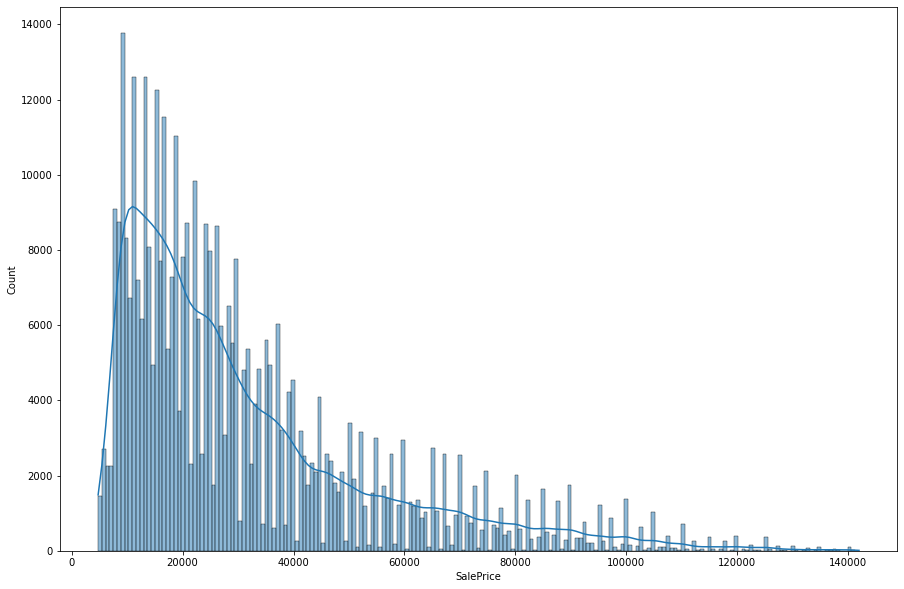

In [296]:
fig, ax = plt.subplots(figsize = (15,10))

ax = sns.histplot(df_tmp.SalePrice, kde = True)
plt.show()

In [297]:
from scipy.stats.mstats import normaltest
from scipy.stats import boxcox
from scipy.special import inv_boxcox

In [298]:
normaltest(y)

NormaltestResult(statistic=107902.94237917075, pvalue=0.0)

In [299]:
y_norm,lam = boxcox(y)

In [300]:
lam

-0.09997219740899008

In [301]:
normaltest(y_norm)

NormaltestResult(statistic=23357.208633680762, pvalue=0.0)

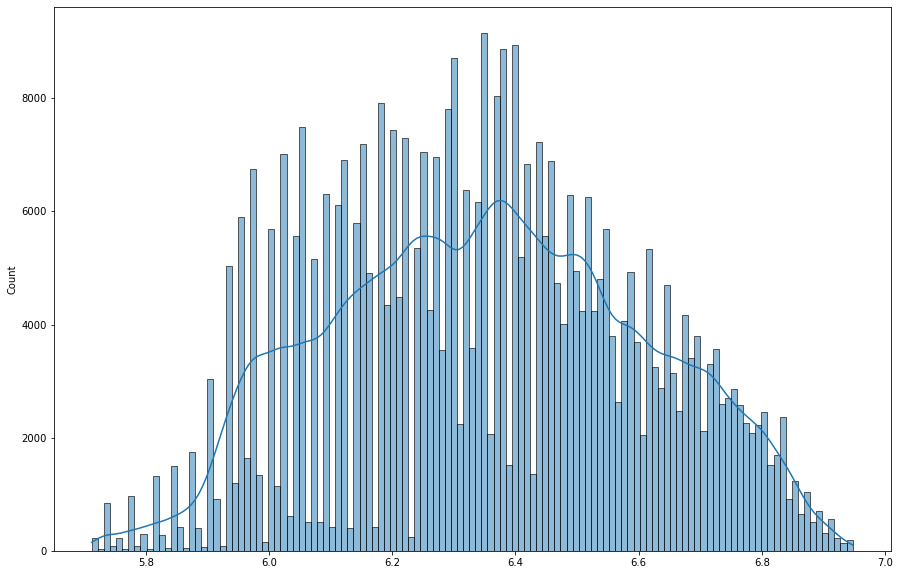

In [303]:
fig, ax = plt.subplots(figsize = (15,10))

ax = sns.histplot(y_norm, kde = True)
plt.show()

In [304]:
from sklearn.preprocessing import StandardScaler

In [305]:
from sklearn.model_selection import train_test_split

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y_norm, test_size = 0.2)

In [307]:
scaler = StandardScaler()

In [308]:
scaler = scaler.fit(X_train)

In [309]:
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [311]:
y_train_inv = inv_boxcox(y_train, lam)
y_test_inv = inv_boxcox(y_test, lam)

# Trying out different models

In [310]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [315]:
def train(model, X, y, model_name):
    
    model.fit(X, y)
    pred = model.predict(X)
    pred_inv = inv_boxcox(pred, lam)
    
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print(f"CV Score: {cv_score}")
    
    mse = mean_squared_error(y_train_inv, pred_inv)
    mae = mean_absolute_error(y_train_inv, pred_inv)
    r2 = r2_score(y_train_inv, pred_inv)
    
    return pd.DataFrame(index = [model_name], data = {'CV': cv_score,
                                                      'MSE': mse,
                                                      'MAE': mae,
                                                      'R2': r2})

In [316]:
scores_list = []

In [317]:
lgbm_model = LGBMRegressor()
scores_list.append(train(lgbm_model, X_train_s, y_train, 'LGBMRegressor_nmse'))

Model Report
CV Score: 0.008559017460826981


In [319]:
xgb_model = XGBRegressor(n_jobs = -1)
scores_list.append(train(xgb_model, X_train_s, y_train, 'XGBRegressorr_nmse'))

Model Report
CV Score: 0.00707688916881988


In [320]:
pd.concat(scores_list, axis = 0)

,CV,MSE,MAE,R2
LGBMRegressor_nmse,0.01,82278236.82,5650.47,0.85
XGBRegressorr_nmse,0.01,60325761.89,4886.88,0.89


In [322]:
%%time
cb_model = CatBoostRegressor()
scores_list.append(train(cb_model, X_train_s, y_train, 'CatBoostRegressor_nmse'))

Learning rate set to 0.102362
0:	learn: 0.2386948	total: 148ms	remaining: 2m 28s
1:	learn: 0.2270462	total: 229ms	remaining: 1m 54s
2:	learn: 0.2168926	total: 294ms	remaining: 1m 37s
3:	learn: 0.2079892	total: 364ms	remaining: 1m 30s
4:	learn: 0.2005434	total: 444ms	remaining: 1m 28s
5:	learn: 0.1939480	total: 514ms	remaining: 1m 25s
6:	learn: 0.1868840	total: 601ms	remaining: 1m 25s
7:	learn: 0.1813167	total: 698ms	remaining: 1m 26s
8:	learn: 0.1764189	total: 798ms	remaining: 1m 27s
9:	learn: 0.1719966	total: 902ms	remaining: 1m 29s
10:	learn: 0.1682418	total: 972ms	remaining: 1m 27s
11:	learn: 0.1649409	total: 1.04s	remaining: 1m 25s
12:	learn: 0.1613472	total: 1.13s	remaining: 1m 25s
13:	learn: 0.1580868	total: 1.22s	remaining: 1m 26s
14:	learn: 0.1551284	total: 1.29s	remaining: 1m 24s
15:	learn: 0.1525324	total: 1.39s	remaining: 1m 25s
16:	learn: 0.1501377	total: 1.45s	remaining: 1m 23s
17:	learn: 0.1482243	total: 1.52s	remaining: 1m 22s
18:	learn: 0.1462204	total: 1.6s	remaining: 

In [324]:
pd.concat(scores_list, axis = 0).sort_values('CV', ascending = False)

,CV,MSE,MAE,R2
LGBMRegressor_nmse,0.01,82278236.82,5650.47,0.85
XGBRegressorr_nmse,0.01,60325761.89,4886.88,0.89
CatBoostRegressor_nmse,0.01,57102700.84,4714.01,0.89


# Todo:
* Add more explanatory data analysis in the beginning. (I did EDA on a different notebook. This is supposed to be the clean version)
* Finalize the best suited model with hyperparameter turning